In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
delivery_data = pd.read_csv("delivery_time.csv")
delivery_data.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
delivery_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
#To check null values
delivery_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<AxesSubplot:>

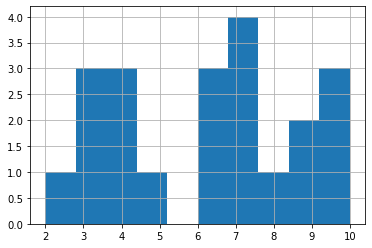

In [9]:
# histogram of dataset
delivery_data['Sorting Time'].hist()

<AxesSubplot:>

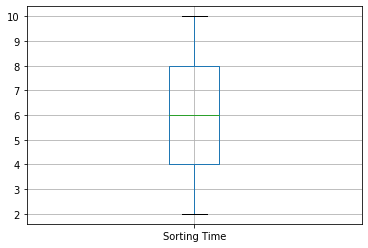

In [10]:
#Box plot for data set
delivery_data.boxplot(column=['Sorting Time'])

<AxesSubplot:>

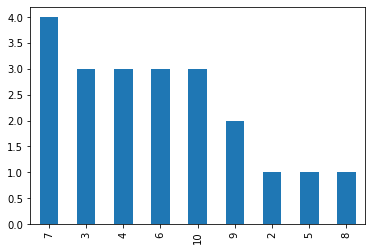

In [11]:
#Bar plot for dataset
delivery_data['Sorting Time'].value_counts().plot.bar()

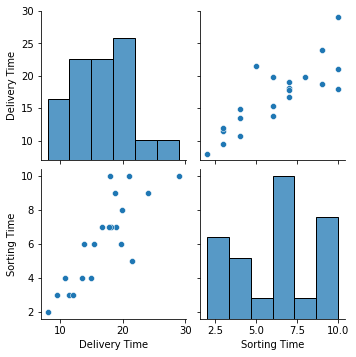

In [12]:
# Seaborn visualization library
import seaborn as sns
# Create the pairplot
sns.pairplot(delivery_data)

In [14]:
#To check Correlation
delivery_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\kamali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

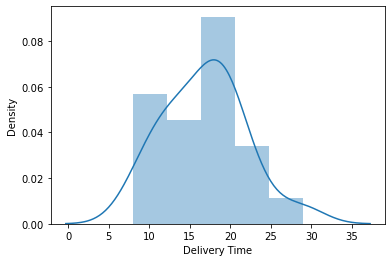

In [15]:
import seaborn as sns
sns.distplot(delivery_data['Delivery Time'])

C:\Users\kamali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

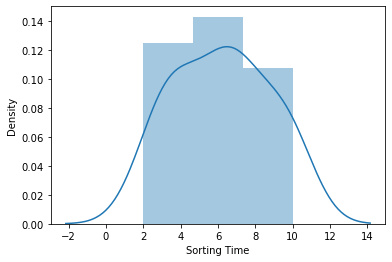

In [16]:
import seaborn as sns
sns.distplot(delivery_data['Sorting Time'])

In [20]:
delivery_data = delivery_data.rename(columns = {'Delivery Time': 'DT', 'Sorting Time': 'ST'}, inplace = False)

In [21]:
delivery_data

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [22]:
import statsmodels.formula.api as sfa
#Building linear regression using ordinary least square technique
linear_model = sfa.ols("DT~ST",data = delivery_data).fit()

In [23]:
linear_model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [24]:
sorting_data = pd.read_csv('ST_data.csv')
sorting_data

,Sorting_time
0,11
1,20
2,30
3,1
4,12


In [26]:
train_data = delivery_data[['ST']]
train_data

,ST
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [27]:
linear_model.predict(train_data)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

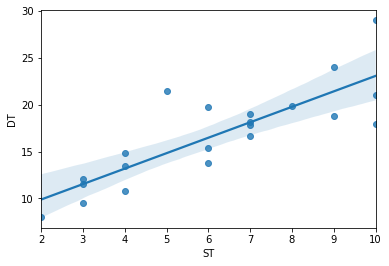

In [28]:
sns.regplot(x="ST", y="DT", data=delivery_data);

In [30]:
# t and p-Values
print(linear_model.tvalues, '\n', linear_model.pvalues)  

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [32]:
#R squared values
(linear_model.rsquared,linear_model.rsquared_adj,linear_model.aic)

(0.6822714748417231, 0.6655489208860244, 106.71400170798609)